## Predicting Heart-Disease Using Machine Learning
This notebook looks into using various pythin-based machine learning and datascience libraries in an attempt to build a machine learning model capable of predicting wheather someone has heart-disease or not based on their medical attributes.                                                   
                                                                           
What approach we are going to Take:                                              
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

### 1-Problem Defination

In a statement , it is to predict wheather it is a classification problem, regression, clustring, or other.
> To predict wheather a patient has heart-disease or not by looking a the clinical report of patient.


### 2-Data

Info about data : Where did it come from , what data we have.

>>The Orignal data came form Cleavland data from the Uci Machine learning repository https://archive.ics.uci.edu/ml/datasets/heart+disease

>>One other version is also available on Kaggle

### 3-Evaluation

>>If we can reach about 95% accuracy of predicting wheather a person has a heart disease or not during the proof of  concept , we can persue the  project .

### 4-Features

This is where we started to know about the data, 
**Creating a Data dictionary**
Attribute Information: "To tell what attributes are in the columns"

        * age
        * sex
        * chest pain type (4 values)
        * resting blood pressure
        * serum cholestoral in mg/dl
        * fasting blood sugar > 120 mg/dl
        * resting electrocardiographic results (values 0,1,2)
        * maximum heart rate achieved
        * exercise induced angina
        * oldpeak = ST depression induced by exercise relative to rest
        * the slope of the peak exercise ST segment
        * number of major vessels (0-3) colored by flourosopy
        * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
        
        
    1. age - age in years 
    2. sex - (1 = male; 0 = female) ",
    3. cp - chest pain type \n",
        * 0: Typical angina: chest pain related decrease blood supply to the heart",
        * 1: Atypical angina: chest pain not related to heart",
        * 2: Non-anginal pain: typically esophageal spasms (non heart related)",
        * 3: Asymptomatic: chest pain not showing signs of disease",
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)",
        * anything above 130-140 is typically cause for concern",
    5. chol - serum cholestoral in mg/dl ",
        * serum = LDL + HDL + .2 * triglycerides",
        * above 200 is cause for concern",
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) ",
        * '>126' mg/dL signals diabetes",
    7. restecg - resting electrocardiographic results",
        * 0: Nothing to note",
        * 1: ST-T Wave abnormality",
            - can range from mild symptoms to severe problems",
            - signals non-normal heart beat",
        * 2: Possible or definite left ventricular hypertrophy",
            - Enlarged heart's main pumping chamber",
    8. thalach - maximum heart rate achieved ",
    9. exang - exercise induced angina (1 = yes; 0 = no) ",
    10. oldpeak - ST depression induced by exercise relative to rest ",
        * looks at stress of heart during excercise",
        * unhealthy heart will stress more",
    11. slope - the slope of the peak exercise ST segment",
        * 0: Upsloping: better heart rate with excercise (uncommon)",
        * 1: Flatsloping: minimal change (typical healthy heart)",
        * 2: Downslopins: signs of unhealthy heart",
    12. ca - number of major vessels (0-3) colored by flourosopy ",
        * colored vessel means the doctor can see the blood passing through",
        * the more blood movement the better (no clots)",
    13. thal - thalium stress result",
        * 1,3: normal",
        * 6: fixed defect: used to be defect but ok now",
        * 7: reversable defect: no proper blood movement when excercising 
    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the Tools
We are going to prepare different tools for data Analysis and Manipulation

In [1]:
# Import EDA(Exploratily Data Analysis) and ploting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%

# Import Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Models for Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import plot_roc_curve




## Data Exploration (Exploratory Data Analysis EDA)
The goal here is to find out more about data and become a sbject matter expert on the Dataset you are working with ..

1. What questions you are trying to solve ?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal it ?
4. What are the outliers and why should you care about them?
5. how can you add, remove or change features to get more out of your data?

In [2]:
# Export Data 
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.shape

(303, 14)

In [3]:
# to view data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check for missing Values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Information about Data
heart_disease.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# To get more details about the Data 
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# to check Catagries in the specific Column
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

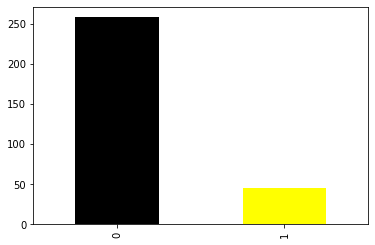

In [8]:
# Lets visuallise it 
heart_disease["fbs"].value_counts().plot(kind ="bar", color = ["black", "yellow"])

In [9]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
heart_disease["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(heart_disease["target"], heart_disease["sex"])

sex,0,1
target,,
0,24,114
1,72,93


cp - chest pain type \n",                                                        
    * 0: Typical angina: chest pain related decrease blood supply to the heart",               
    * 1: Atypical angina: chest pain not related to heart",                                       
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)",                      
    * 3: Asymptomatic: chest pain not showing signs of disease",                                

In [12]:
heart_disease["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [13]:
heart_disease["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

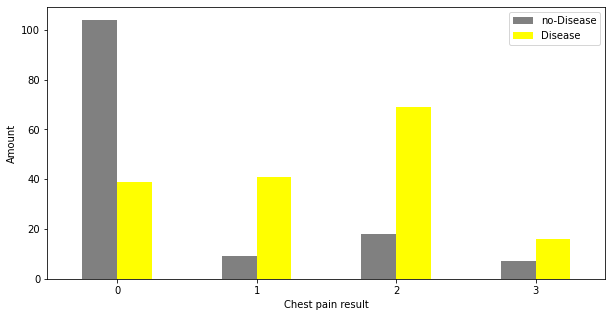

In [14]:
# lets Draw the Graph to visuallise it 
pd.crosstab(heart_disease["cp"], heart_disease["target"]).plot(kind = "bar",
                                                                figsize = (10,5),
                                                                color = ["gray", "yellow"],
                                                               )
# plt.legend(["male", "female"])
plt.xlabel("Chest pain result")
plt.ylabel("Amount");
plt.legend(["no-Disease", "Disease"]);
plt.xticks(rotation = 0);


In [15]:
heart_disease["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [16]:
pd.crosstab(heart_disease["target"], heart_disease["ca"])

ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


In [17]:
heart_disease["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


restecg - resting electrocardiographic results",                                    
    * 0: Nothing to note",                                         
    * 1: ST-T Wave abnormality",                                                
        - can range from mild symptoms to severe problems",                           
        - signals non-normal heart beat",                                     
    * 2: Possible or definite left ventricular hypertrophy",                                
        - Enlarged heart's main pumping chamber"                                   

In [19]:
pd.crosstab(heart_disease["target"], heart_disease["restecg"])

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


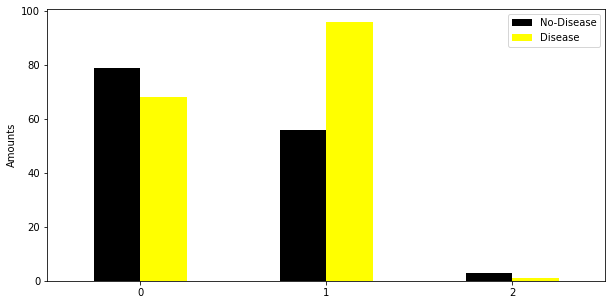

In [20]:
pd.crosstab(heart_disease["restecg"], heart_disease["target"]).plot(kind = "bar",
                                                                   figsize = (10, 5),
                                                                   color = ["black", "yellow"])
plt.xticks(rotation = 0)
plt.xlabel( "")
plt.ylabel("Amounts")
plt.legend(["No-Disease", "Disease"])

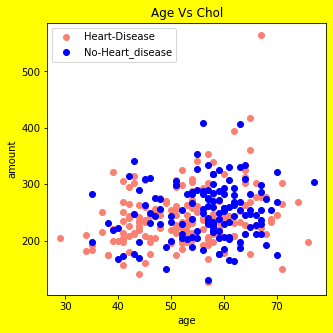

In [21]:
fig, ax = plt.subplots(figsize = (5,5), facecolor = "yellow")
ax.scatter(heart_disease.age[heart_disease["target"] == 1], heart_disease.chol[heart_disease["target"] ==1],
          facecolor = "salmon")
ax.set(xlabel = "age",
      ylabel = "amount",
      title = "Age Vs Chol",
      facecolor = "white")
ax.scatter(heart_disease.age[heart_disease["target"] == 0], heart_disease.chol[heart_disease["target"] ==0],
          facecolor = "blue")
ax.legend(["Heart-Disease", "No-Heart_disease"])

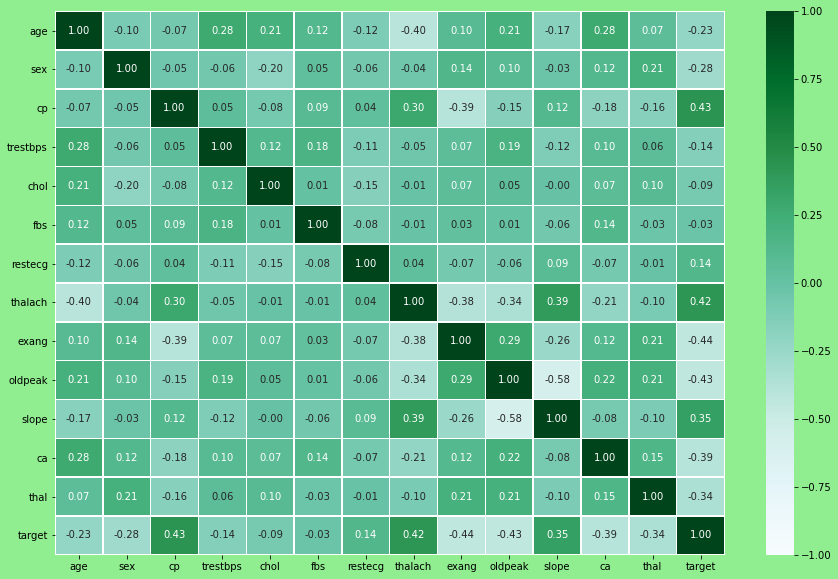

In [22]:
# Lets look at the coorelations 
corr_details = heart_disease.corr()
fig, ax = plt.subplots(figsize = (15, 10), facecolor = "lightgreen" )
ax = sns.heatmap(corr_details,
                 fmt = ".2f",
                cmap= "BuGn",
                linewidths= 0.5 ,
                annot= True,
                vmin= -1,
                vmax=1,
                center=0) 

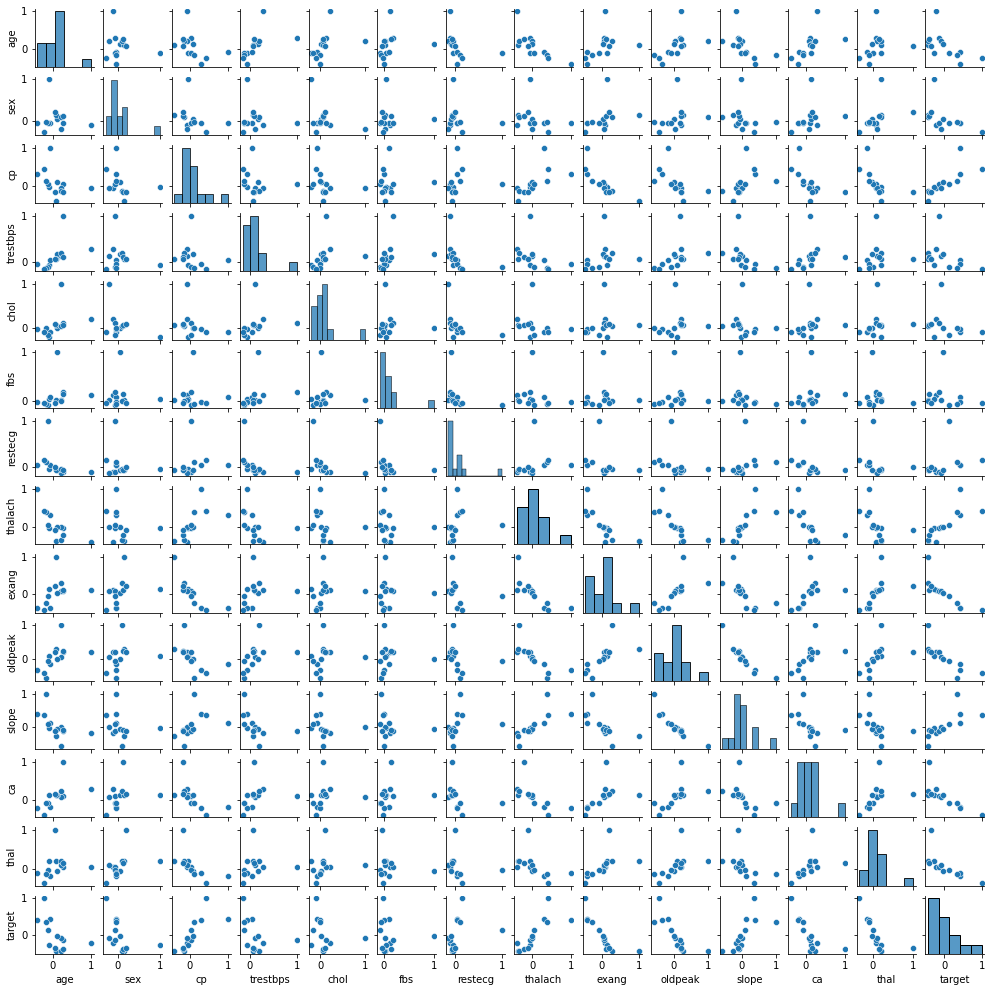

In [23]:
sns.pairplot(heart_disease.corr(), height= 1)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<AxesSubplot:ylabel='Frequency'>

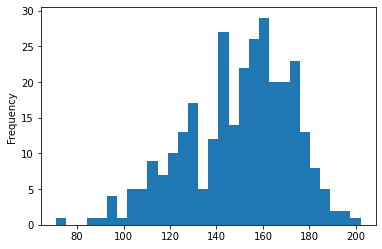

In [24]:
heart_disease.thalach.plot.hist(bins=30)

## Modeling 

In [25]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Prepare Data
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]


In [27]:
# Check for any missing data 
X.isna().sum() , len(X)

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 dtype: int64,
 303)

In [28]:
# Set for train test and Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Now we have set our data into train test and slit its time to build a machine learning model.
                                                       
We are going to try three different machine learning models
1. **Logistic Regression**
2. **KNearest_Nighbour**
3. **Random Forest Classifier**

In [29]:
# We will make a function to build all three models within one function
np.random.seed(42)
def models(x_train, x_test, y_train, y_test):
    R_clf = RandomForestClassifier()
    K_clf = KNeighborsClassifier(n_neighbors= 18, leaf_size=50, p=2)
    L_reg = LogisticRegression()
    
    
    #Training session
    R_clf.fit(x_train, y_train)
    K_clf.fit(x_train, y_train)
    L_reg.fit(x_train, y_train)
    
    
    #Test Session
    print(f"This is the result of Random Forrest Classifier : {R_clf.score(x_test, y_test)*100}")
    print(f"This is the result of K Nighbour Classifier : {K_clf.score(x_test, y_test)*100}")
    print(f"This is the result of Logidtic Regression : {L_reg.score(x_test, y_test)*100}")


In [30]:
models(X_train, X_test, Y_train, Y_test)

This is the result of Random Forrest Classifier : 85.24590163934425
This is the result of K Nighbour Classifier : 65.57377049180327
This is the result of Logidtic Regression : 86.88524590163934


C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
models = {
    "RandomForestClassifier" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "K Nearest Neighbour" : KNeighborsClassifier()
}

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    '''
        model : set of different machine learning models
        X_Train = training data(no labels)
        Y_Train = training data(labels)
        X_Test = test data (no Label)
        Y_Test = test data(labels)
        
    '''
    "Set Random seed"
    
    np.random.seed(42)
    
    #Model_Scores
    model_score = {}
    for name , model in models.items():
#         Fit the model to the data
        model.fit(X_train, Y_train)
#         Scoring data
        
        model_score[name] = model.score(X_test, Y_test)
    return model_score

fit_and_score(models, X_train, X_test, Y_train, Y_test)
        

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8524590163934426,
 'Logistic Regression': 0.8688524590163934,
 'K Nearest Neighbour': 0.6229508196721312}

In [32]:
models = {
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNearestNeighbour" : KNeighborsClassifier(),
    "LogisticRegression" : LogisticRegression()
}

def fit_and_test(models, X_train, X_test, Y_train, Y_test):
    model_scores = {}
    np.random.seed(42)
    for names, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[names] = model.score(X_test, Y_test)
    return model_scores
    

fit_and_test(models, X_train, X_test, Y_train, Y_test)


C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8524590163934426,
 'KNearestNeighbour': 0.6229508196721312,
 'LogisticRegression': 0.8688524590163934}

In [33]:
model_result = fit_and_test(models, X_train, X_test, Y_train, Y_test)


C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
model_result

{'RandomForestClassifier': 0.8524590163934426,
 'KNearestNeighbour': 0.6229508196721312,
 'LogisticRegression': 0.8688524590163934}

In [35]:
data = pd.DataFrame(model_result, index = ["Accuracy"])

<AxesSubplot:>

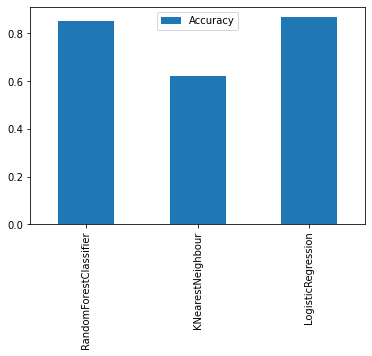

In [36]:
data.T.plot.bar()

We have amde model_base line and realised that its not perfect :                           
What to do next ?                                                      
    * Hyperparameter Tunning (this step is in every machine learnign model)                                
    * Feature Importance (this step is in every machine learnign model)                                          
    * COnfusion Metrix                               
    * Cross Validation                               
    * Precision                                                                 
    * Accuracy                                                                
    * F1 score                                 
    * Recall                                
    * Classification Report                                 
    * ROC curve                                 
    * Area Under Curve (AUC)                                

### Hyperparameter Tunning

In [37]:
# Lets Tune KNN classifier
np.random.seed(42)

training_scores = []
test_scores = []

# Set different  values of n_neighbours
n_neighbours = range(1, 21)

# set instance for KNN
knn = KNeighborsClassifier()


for i in n_neighbours:
    knn.set_params(n_neighbors = i)
    #Fit the algorithum
    knn.fit(X_train, Y_train)
    
    #update training score list
    training_scores.append(knn.score(X_train, Y_train))
    
    #update test score list
    test_scores.append(knn.score(X_test, Y_test))



In [38]:
max(training_scores)


1.0

In [39]:
max(test_scores)

0.7377049180327869

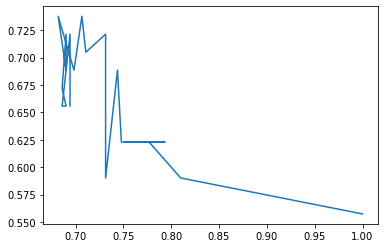

In [40]:
plt.plot(training_scores, test_scores)

Maximum Score is :  73.77 


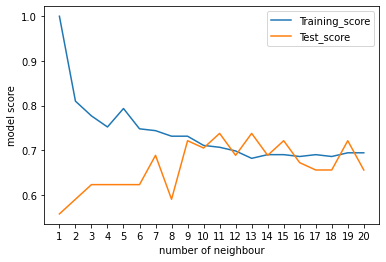

In [41]:
plt.plot(n_neighbours, training_scores, label = "Training_score")
plt.plot(n_neighbours, test_scores, label = "Test_score")
plt.legend()
plt.xlabel("number of neighbour")
plt.ylabel("model score")

plt.xticks(np.arange(1, 21, 1));

print(f"Maximum Score is : {max(test_scores) * 100: .2f} ")

### Hyperarameter Tunning (By Hand) Using Ranodomized Search CV



In [155]:
# This time we will Tune Logistic Regression Model
log_reg_mod = {
    "C" : np.logspace(-4, 4, 20),
    "solver" : ["liblinear","newton-cg"]
}

rand_for_cls = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth" : ["None", 3, 5, 10],
    "min_samples_split" : np.arange(4, 20, 2),
    "min_samples_leaf" : np.arange(3, 2, 2)
}

In [156]:
# Set random Seed 
np.random.seed(42)

# First set up Random hyperparameter search for Logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_mod,
                               cv=10,
                               verbose= True,
                               n_iter= 20)
rs_log_reg.fit(X_train, Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.9s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg']},
                   verbose=True)

In [157]:
rs_log_reg.best_params_

{'solver': 'newton-cg', 'C': 0.615848211066026}

In [158]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

In [159]:
# Set random seed
np.random.seed(42)

# Setup random parameter for RandomForestClassifier
rs_rand_cls = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions= rand_for_cls,
                                 cv = 10,
                                n_iter= 5,
                                verbose=False)

rs_rand_cls.fit(X_train, Y_train)

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 0 is smaller than n_iter=20. Running 0 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: No fits were performed. Was the CV iterator empty? Were there no candidates?

In [47]:
# Find the best Hyperparameters for THis :
rs_rand_cls.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [48]:
rs_rand_cls.score(X_test, Y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [ ]:
model_result

### Now we will try Grid Search CV for hyperperameter Tunning

#### This can be done :
> By Hand                                                                          
> Randomized Search CV                                                                          
> GridSearchCV                                                                          

In [55]:
rand_fore_cls = {
    "n_estimators" : np.arange(10, 100, 50),
    "max_depth" : ["None", 3,5,10],
    "min_samples_split" : np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2)
    
}

gs_rand_cls = GridSearchCV(RandomForestClassifier(),
                          param_grid= rand_fore_cls,
                          cv = 5,
                          verbose = True)

gs_rand_cls.fit(X_train, Y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\he

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AmmarAhmad\Desktop\Projects\heart-disease-project\env\lib\site-packages\joblib\parallel.py", line 866, in dispa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': ['None', 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [56]:
# Check for the best Parameter 
gs_rand_cls.best_params_

{'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 10}

In [57]:
# Chceck for the improvement
gs_rand_cls.score(X_test, Y_test)

0.7868852459016393

In [58]:
# Let Tune Logistic Regression moel
log_reg = {
    "C" : np.logspace(-4, 4, 30),
    "solver" : ["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg,
                         cv = 5,
                         verbose= True)
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
gs_log_reg.score(X_test, Y_test)

0.8524590163934426

# Evaluating our tuned model Using 

* ROC curve and AUC curve
* Confusion Metric 

In [61]:
np.random.seed(42)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test) * 100

85.24590163934425

In [62]:
y_preds = model.predict(X_test)

In [63]:
y_preds

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [64]:
Y_test

136    1
247    0
237    0
276    0
38     1
      ..
150    1
159    1
277    0
109    1
252    0
Name: target, Length: 61, dtype: int64

##### In ROC Cureve We Use :
`X_test and Y_test`

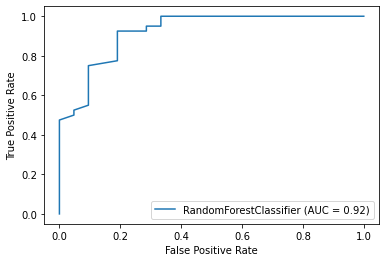

In [65]:
# Ploting ROC curve 
plot_roc_curve(model, 
              X_test, 
              Y_test
)


##### In confusion Metrics We Use                 

`Y_test and Y_preds`

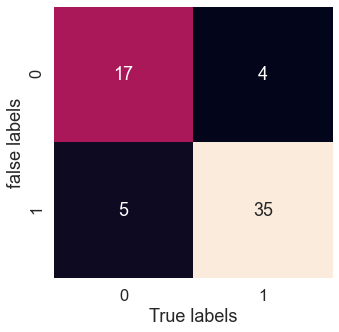

In [66]:
# Confusion metric 
sns.set(font_scale = 1.5)
def plot_conf_metric(Y_test, y_preds):
    ax, fig = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                    annot= True,
                    cbar= False)
    plt.xlabel("True labels")
    plt.ylabel("false labels")

plot_conf_metric(Y_test, y_preds)

 Now When we have done confusion metrix and ROC and AUC curve, This time we will take a look at classification report , precision, recall and f1-score

In [67]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.90      0.88      0.89        40

    accuracy                           0.85        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



##### Now we will use cr0ss Validation Score to seperaltry check every parameter 
> * In this we Need X, Y, annot, scoring = {'accuracy', "precision', 'f1-score', 'recall'}

In [68]:
# First we have to select best parameters form grid search CV, Then we will apply it on Cross val Score
model = RandomForestClassifier()
cross_val_score(model,
               X, Y, cv = 5)

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [69]:
# Cross val accuracy
cross_acc = cross_val_score(model, 
                           X, 
                           Y, 
                           cv = 5, 
                           scoring= "accuracy")
cross_acc_mean = np.mean(cross_acc)
cross_acc_mean

0.8281420765027322

In [70]:
# cross val precision
cross_prec = cross_val_score(model,
                            X, 
                            Y, 
                            cv = 5, 
                            scoring = "precision")
cross_prec_mean = np.mean(cross_prec)
cross_prec_mean

0.8380795442115726

In [71]:
# Cross val recall
cross_recall = cross_val_score(model,
                            X, 
                            Y, 
                            cv = 5, 
                            scoring = "recall")
cross_recall_mean = np.mean(cross_recall)
cross_recall_mean

0.8545454545454545

In [72]:
# Cross val f1-score
cross_f1 = cross_val_score(model,
                            X, 
                            Y, 
                            cv = 5, 
                            scoring = "f1")
cross_f1_mean = np.mean(cross_f1)
cross_f1_mean

0.8451124860529424

In [73]:

# Let Visuallize this :
cross_val_map = pd.DataFrame({"Accuracy": cross_acc_mean,
                             "Precision": cross_prec_mean,
                             "Recall": cross_recall_mean,
                             "F1_score": cross_f1_mean},
                            index= [0])
cross_val_map

,Accuracy,Precision,Recall,F1_score
0,0.828142,0.83808,0.854545,0.845112


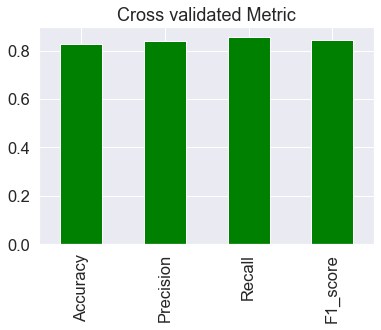

In [74]:
cross_val_map.T.plot.bar(legend = False, color = ['green', 'blue'],
                        title = "Cross validated Metric");

# Practice Waiy he waisy

In [75]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

h_clf = HistGradientBoostingClassifier(min_samples_leaf=16,
                                      max_depth=6,
                                      max_iter=2,
                                      max_leaf_nodes=5,
                                      
                                      scoring= "f1")
h_clf.fit(X_train, Y_train);

In [76]:
h_clf.score(X_test, Y_test)

0.819672131147541

In [77]:
model = RandomForestClassifier(n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
model.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [78]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Test score: {:.2f}'.format(model.score(X_train, Y_train), 
                                                                                             model.oob_score_,
                                                                                             model.score(X_test, Y_test)))

R^2 Training Score: 1.00 
OOB Score: 0.80 
R^2 Test score: 0.85


#### Best Hyper parameters to tune RandomForestClassifier:
>    * `class_weight` 
>    * `criterion`
>    * `max_depth`
>    * `max_features`
>    * `max_leaf_nodes`

In [79]:
model = RandomForestClassifier(class_weight = "balanced",
                              criterion = "entropy",
                              max_depth = 1,
                              max_features="log2",
                              max_leaf_nodes= 5)


In [80]:
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1, max_features='log2', max_leaf_nodes=5)

In [82]:
map_f = model.feature_importances_

In [84]:
dicti_f = dict(zip(heart_disease.columns, model.feature_importances_))

In [85]:
dicti_f

{'age': 0.03,
 'sex': 0.0,
 'cp': 0.19,
 'trestbps': 0.0,
 'chol': 0.0,
 'fbs': 0.0,
 'restecg': 0.01,
 'thalach': 0.09,
 'exang': 0.15,
 'oldpeak': 0.15,
 'slope': 0.1,
 'ca': 0.11,
 'thal': 0.17}

In [88]:
data_frame = pd.DataFrame(dicti_f, index = [0])

In [89]:
data_frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.03,0.0,0.19,0.0,0.0,0.0,0.01,0.09,0.15,0.15,0.1,0.11,0.17


<AxesSubplot:>

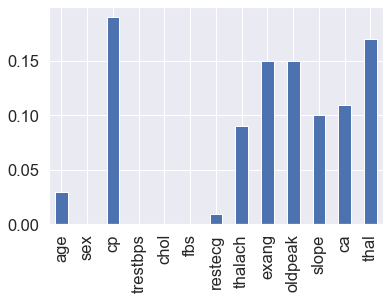

In [90]:
data_frame.T.plot.bar(legend = False)

In [102]:
X = heart_disease.drop(["target", "age", "sex", "trestbps", "chol","fbs", "restecg"], axis = 1)
Y = heart_disease["target"]

In [148]:
np.random.seed(42)
model = RandomForestClassifier(class_weight=None,
                               criterion='entropy',
                               max_depth=16,
                               max_features='log2',
                               max_leaf_nodes=15)

model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       max_leaf_nodes=15)

In [149]:
model.score(X_test, Y_test)

0.8852459016393442